# 03.02 배열의 생성과 변형

## NumPy의 자료형

NumPy의 배열 즉, `ndarray`클래스는 데이터가 **같은 자료형이어야** 한다. `array` 명령으로 배열을 만들 때 자료형을 명시적으로 적용하려면 `dtype` 인수를 사용한다. 만약 `dtype` 인수가 없으면 주어진 데이터를 저장할 수 있는 자료형을 스스로 유추한다. 만들어진 배열의 자료형을 알아내려면 `dtype` 속성을 본다.

In [4]:
import numpy as np

x = np.array([1, 2, 3])
x.dtype

dtype('int64')

In [ ]:
## 정수와 floot가 함께 있으면 모두 floot로

---------------

 `dtype` 인수로 지정할 자료형은 다음 표에 보인것과 같은 "dtype 접두사"로 시작하는 문자열이고 이 글자 뒤에 오는 숫자는 바이트 수 혹은 글자 수를 의미한다. 예를 들어 `f8`은 8바이트(64비트) 부동소수점 실수를 뜻하고 `U4` 는 4글자 유니코드 문자열을 뜻한다. 숫자를 생략하면 운영체제에 따라 알맞은 크기를 지정한다.

| dtype 접두사 | 설명 | 사용 예 |
|-|-|-|
| `b` | 불리언 | `b` (참 혹은 거짓) | 
| `i` | 정수 | `i8` (64비트) | 
| `u` | 부호 없는 정수 | `u8` (64비트) | 
| `f` | 부동소수점 | `f8` (64비트) | 
| `c` | 복소 부동소수점 | `c16` (128비트) | 
| `O` | 객체 | `0` (객체에 대한 포인터) | 
| `S` | 바이트 문자열 | `S24` (24 글자) | 
| `U` | 유니코드 문자열 | `U24` (24 유니코드 글자) | 

표 4.1.1 : dtype 인수로 지정할 자료형

In [2]:
np.array([0,2.0, "Hello"]) # Unicode 32자 보다 작음

array(['0', '2.0', 'Hello'], dtype='<U32')

In [3]:
x = np.array([1,2,3])
x.dtype

dtype('int64')

In [4]:
x = np.array([1,2,3], dtype='f')
x.dtype

dtype('float32')

## Inf와 NaN

NumPy에서는 무한대를 표현하기 위한 **`np.inf`(infinity)** 와 정의할 수 없는 숫자를 나타내는 **`np.nan`(not a number)** 을 사용할 수 있다. 다음 예와 같이 1을 0으로 나누려고 하거나 0에 대한 로그 값을 계산하면 무한대인 **`np.inf`** 이 나온다. 0을 0으로 나누려고 시도하면 **`np.nan`** 이 나온다.

![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile30.uf.tistory.com%2Fimage%2F2652D93358E24E7E2E9000)


![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile2.uf.tistory.com%2Fimage%2F274F6F3358E24E7D0EEFE1)

## 배열 생성

NumPy는 몇가지 간단한 배열을 생성하는 명령을 제공한다.
 
* `zeros`, `ones`
* `zeros_like`, `ones_like`
* `empty`
* `arange`
* `linspace`, `logspace`
* `rand`, `randn`

## Array 초기화

### (1) 0으로 초기화
크기가 정해져 있고 모든 값이 0인 배열을 생성하려면 **`zeros` 명령**을 사용한다. 인수로는 배열을 크기를 뜻하는 정수를 넣는다.

크기를 뜻하는 튜플을 입력하면 **다차원 배열**도 만들 수 있다.

`array` 명령과 마찬가지로 **`dtype` 인수**를 명시하면 해당 자료형 원소를 가진 배열을 만든다.

문자열 배열도 가능하지면 모든 원소의 문자열 크기가 같아야 한다. 만약 더 큰 크기의 문자열을 할당하면 잘릴 수 있다.

---
0이 아닌 **1로 초기화**된 배열을 생성하려면 **`ones` 명령**을 사용한다.

In [75]:
e = np.ones( (2, 3, 4), dtype='i8')
e

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

---
만약 크기를 튜플로 명시하지 않고 다른 배열과 같은 크기의 배열을 생성하고 싶다면 **`ones_like`, `zeros_like` 명령**을 사용한다.

---
배열의 크기가 커지면 배열을 **초기화하는데도 시간**이 걸린다. 이 **시간을 단축**하려면 **배열을 생성만** 하고 특정한 값으로 초기화를 하지 않는 **`empty`** 명령을 사용할 수 있다. `empty` 명령으로 생성된 배열에는 기존에 메모리에 저장되어 있던 값이 있으므로 배열의 원소의 값을 미리 알 수 없다.

---
## `arange`

**`arange`** 명령은 NumPy 버전의 `range` 명령이라고 볼 수 있다. 특정한 규칙에 따라 증가하는 수열을 만든다. 

In [9]:
[ i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
np.arange(3, 21, 2)

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19])

In [21]:
np.arange(12).reshape(3,4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

---
## `linspace`, `logspace`

`linspace` 명령이나 `logspace` 명령은 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.

### 1. linspace

**a와 b사이에 c개의 점을 생성**하기 위한 명령어입니다.

만약에 c가 생략될 경우 → linspace(a, b) 50개의 일정한 등간격을 가진 행 벡터가 생성됩니다.

* 사용 방법 : **`np.linspace(시작, 끝, 갯수, endpoint=True/False)`**

In [22]:
np.linspace(0, 100, 5) # 시작, 끝, 갯수

array([  0.,  25.,  50.,  75., 100.])

In [27]:
np.linspace(0, 100, 5, endpoint=False)

array([ 0., 20., 40., 60., 80.])

In [28]:
np.linspace(0, 100, 5, endpoint=True)

array([  0.,  25.,  50.,  75., 100.])

In [29]:
np.logspace(0.1, 1, 10)

array([ 1.25892541,  1.58489319,  1.99526231,  2.51188643,  3.16227766,
        3.98107171,  5.01187234,  6.30957344,  7.94328235, 10.        ])

In [30]:
np.logspace(0.1, 2.0, num=20)S

array([  1.25892541,   1.58489319,   1.99526231,   2.51188643,
         3.16227766,   3.98107171,   5.01187234,   6.30957344,
         7.94328235,  10.        ,  12.58925412,  15.84893192,
        19.95262315,  25.11886432,  31.6227766 ,  39.81071706,
        50.11872336,  63.09573445,  79.43282347, 100.        ])

In [33]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0.1, 2.0, 20), np.logspace(0.02, 2.0, 20))

ModuleNotFoundError: No module named 'matplotlib'

---------------

## 전치 연산

2차원 배열의 **전치(transpose) 연산**은 행과 열을 바꾸는 작업이다. 이는 배열의 **`T` 속성**으로 구할 수 있다. 메서드가 아닌 속성이라는 점에 유의 한다.

In [36]:
# A = np.array([1, 2, 3], [4, 5, 6])
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## 배열의 크기 변형

일단 만들어진 배열의 내부 데이터는 보존한 채로 형태만 바꾸려면 **`reshape` 명령**이나 메서드를 사용한다. 예를 들어 12개의 원소를 가진 1차원 행렬은 3x4 형태의 2차원 행렬로 만들 수 있다.

In [40]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [41]:
b = a.reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

사용하는 원소의 갯수가 정해저 있기 때문에 `reshape` 명령의 형태 튜플의 원소 중 하나는 -1이라는 숫자로 대체할 수 있다. -1을 넣으면 해당 숫자는 다를 값에서 계산되어 사용된다.

In [42]:
a.reshape(3, -1)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
a.reshape(2, 2, -1)

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [52]:
c = a.reshape(2, -1, 2)
c

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

---
다차원 배열을 무조건 **1차원으로 펼치기** 위해서는 `flatten` 나 `ravel` 메서드를 사용한다.

In [46]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [48]:
b.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [53]:
c.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

###### ---
배열 사용에서 주의할 점은 길이가 6인 1차원 배열과 **행, 열의 갯수가 (6,1)인 2차원 배열** 또는 **행, 열의 갯수가 (1, 6)인 2차원 배열**은 데이터가 같아도 엄연히 다른 객체라는 점이다.

In [54]:
x = np.arange(6)
x

array([0, 1, 2, 3, 4, 5])

In [56]:
x1 = x.reshape(1, -1)
x1

array([[0, 1, 2, 3, 4, 5]])

In [57]:
x2 = x.reshape(-1,1)
x2

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

이렇게 같은 배열에 대해 차원만 1차원 증가시키는 경우에는 `newaxis` 명령을 사용하기도 한다.

In [58]:
x, x.shape

(array([0, 1, 2, 3, 4, 5]), (6,))

In [59]:
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [60]:
x[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5]])

## 배열 연결

행의 수나 열의 수가 같은 두 개 이상의 배열을 연결하여(concatenate) 더 큰 배열을 만들 때는 다음과 같은 명령을 사용한다.

* `hstack`
* `vstack`
* `dstack`
* `stack`
* `r_`
* `c_`
* `tile`

**`hstack` 명령**은 행의 수가 같은 두 개 이상의 **배열을 옆으로 연결**하여 열의 수가 더 많은 배열을 만든다. 연결할 배열은 하나의 리스트에 담아야 한다.

In [62]:
a1 = np.ones((2, 3))
a1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [63]:
a2 = np.zeros((2, 2))
a2

array([[0., 0.],
       [0., 0.]])

In [64]:
np.hstack([a1, a2])

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]])

In [65]:
np.hstack([a1, a2, a1])

array([[1., 1., 1., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 1., 1., 1.]])

**`vstack` 명령**은 열의 수가 같은 두 개 이상의 배열을 **위아래로 연결**하여 행의 수가 더 많은 배열을 만든다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.

In [67]:
b1 = np.ones((2,3))
b1

array([[1., 1., 1.],
       [1., 1., 1.]])

In [68]:
b2 = np.zeros((3,3))
b2

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [69]:
np.vstack([b1, b2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

---
**`dstack` 명령**은 제3의 축 즉, **행이나 열이 아닌 깊이(depth) 방향으로 배열을 합친다. 가장 안쪽의 원소의 차원이 증가**한다. 즉 가장 내부의 숫자 원소가 배열이 된다. **shape 정보**로 보자면 가장 끝에 값이 2인 차원이 추가되는 것이다.이 예제의 경우에는 shape 변화가 2개의 (3 x 4) -> 1개의 (3 x 4 x **2**)가 된다.

In [ ]:
# 니가 찾아서 봐라

`dstack` 다른 예제
- 두 벡터 간의 dstack 연산의 결과도 3차원 array임에 유의!

(3, ) 벡터 간의 dstack 연산과, (1, 3) 행렬간의 dstack 연산 결과는 동일!

(3, 1) 행렬간의  dstack 연산은 다른 결과가 나온다.

---
**`stack` 명령**은 **`dstack`** 의 기능을 확장한 것으로 **`dstack`** 처럼 마지막 차원으로 연결하는 것이 아니라 **사용자가 지정한 차원(축으로) 배열을 연결**한다. **`axis` 인수(디폴트 0)** 를 사용하여 연결후의 회전 방향을 정한다. 디폴트 인수값은 0이고 가장 앞쪽에 차원이 생성된다. 즉, 배열 두 개가 겹치게 되므로 연결하고자 하는 배열들의 크기가 모두 같아야 한다. 

다음 예에서는 **`axis`= 0** 이므로 **가장 바깥의 값이 2인 차원이 추가**된다. 즉, **shape 변화**는 2개의 (3 x 4) -> 1개의 (**2** x 3 x 4) 이다..

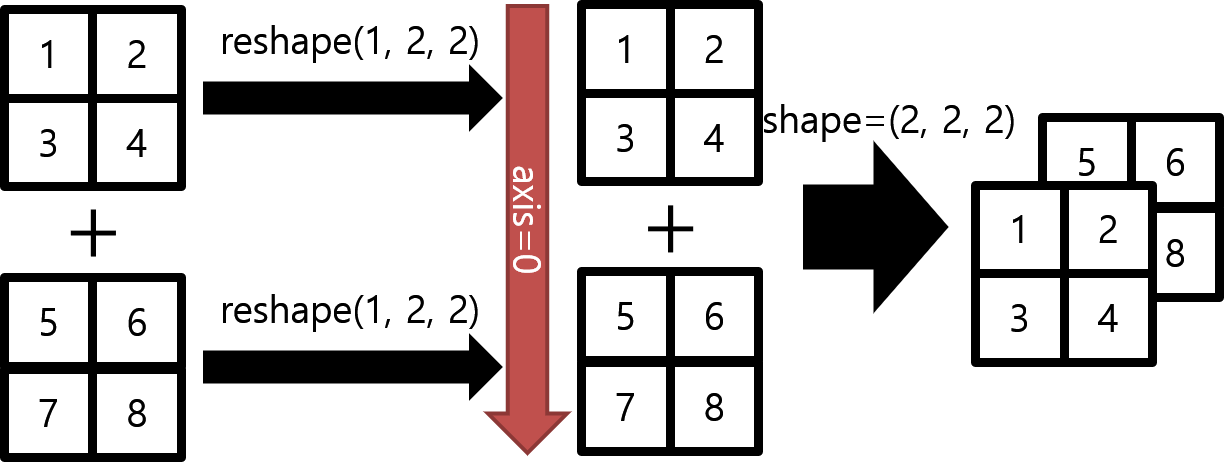

`axis` 인수가 1이면 두번째 차원으로 새로운 차원이 삽입된다. 다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x **2** x 4) 이다

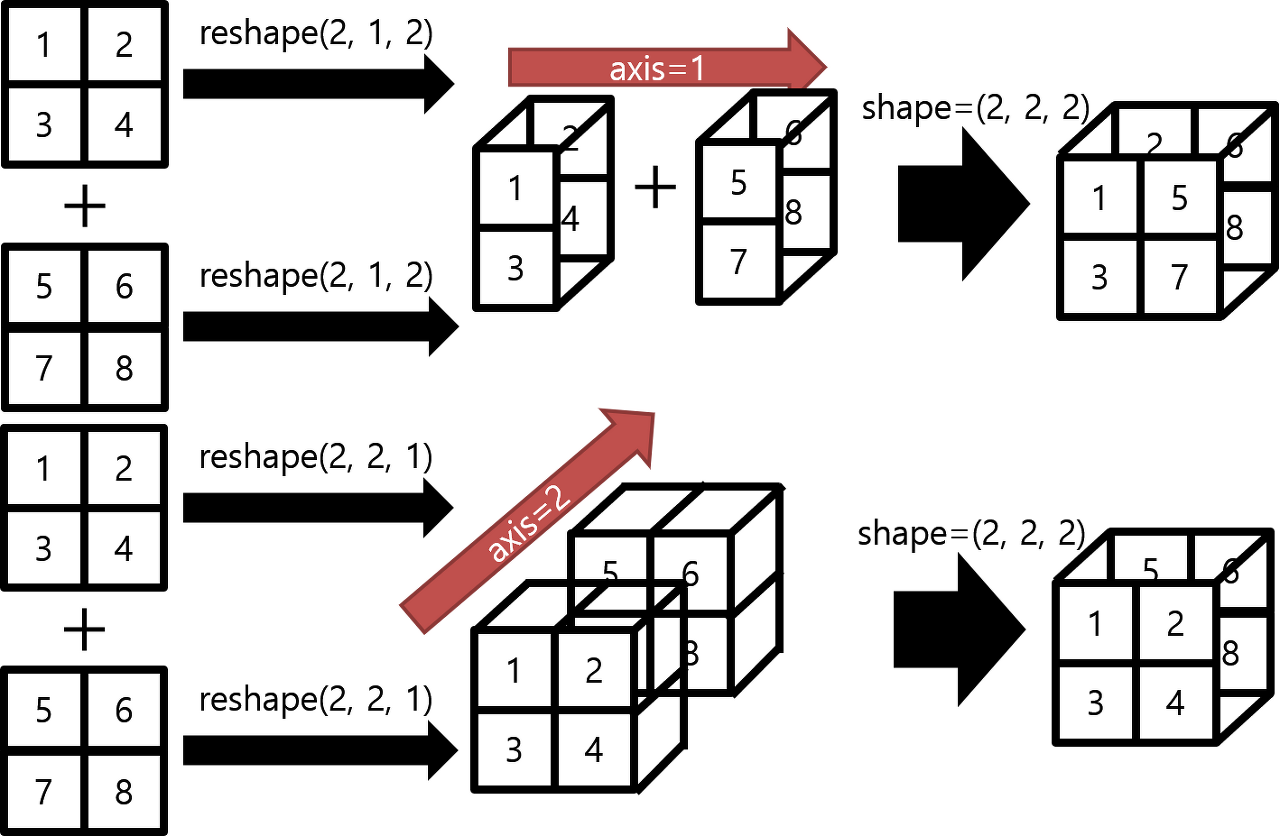

마찬가지로 `axis` 인수가 2이면 **세번째 차원으로 새로운 차원이 삽입**된다. 다음 예에서 즉, shape 변화는 2개의 (3 x 4) -> 1개의 (3 x 4 x  **2**) 이다

**`r_` 메서드**는 **`hstack` 명령과 비슷**하게 **배열을 좌우로 연결**한다. 다만 메서드임에도 불구하고 **소괄호(parenthesis, `()`)를 사용하지 않고 인덱싱과 같이 대괄호(bracket, `[]`)를 사용**한다. 이런 특수 메서드를 **인덱서(indexer)**라고 한다.

같은 작업을 hstack으로 표현해 보면...

**`c_` 메서드**는 배열의 **차원을 증가시킨 후 좌우로 연결**한다. 만약 1차원 배열을 연결하면 2차원 배열이 된다.

**`tile` 명령**은 동일한 배열을 반복하여 연결한다.

In [70]:
a = np.array([[0,1,2], [3,4,5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [71]:
np.tile(a, 2)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [73]:
np.tile(a, (3, 2))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

#### 연습 문제 4.1.4

지금까지 공부한 명령어를 사용하여 다음과 같은 배열을 만들어라.

```python
       array([[   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [  10.,   20.,   30.,   40.,   50.],
              [  60.,   70.,   80.,   90.,  100.],
              [ 110.,  120.,  130.,  140.,  150.],
              [   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [   0.,    0.,    0.,    1.,    1.],
              [  10.,   20.,   30.,   40.,   50.],
              [  60.,   70.,   80.,   90.,  100.],
              [ 110.,  120.,  130.,  140.,  150.]])
```

In [77]:
a1 = np.zeros((1,3))
a1

array([[0., 0., 0.]])

In [79]:
a2 = np.ones((1,2))
a2

array([[1., 1.]])

In [84]:
np.hstack([a1, a2])

array([[0., 0., 0., 3., 3.]])

---
### 2차원 그리드 포인트 생성

변수가 2개인 2차원 함수의 그래프를 그리거나 표를 작성하려면 **2차원 영역에 대한 (x,y) 좌표값 쌍** 즉, **그리드 포인트(grid point)** 를 생성하여 각 좌표에 대한 함수 값을 계산해야 한다. 예를 들어 x, y 라는 두 변수를 가진 함수에서 x가 0부터 2까지, y가 0부터 4까지의 사각형 영역에서 변화하는 과정을 보고 싶다면 이 사각형 영역 안의 다음과 같은 그리드 포인트들에 대해 함수를 계산해야 한다. 

$$ (x,y) = (0,0), (0,1), (0,2), (0,3), (0,4), (1,0), \cdots (2,4) $$

이러한 그리드 포인트를 만드는 과정을 도와주는 것이 `meshgrid` 명령이다. `meshgrid` 명령은 사각형 영역을 구성하는 가로축의 점들과 세로축의 점을 나타내는 두 벡터를 인수로 받아서 이 사각형 영역을 이루는 조합을 출력한다. 결과는 그리드 포인트의 x 값만을 표시하는 행렬과 y 값만을 표시하는 행렬 두 개로 분리하여 출력한다.

In [ ]:
mpl.rcParams['font.family'] = 'Gulim'